From `analysis_notebooks/R68_eff_plot.ipynb`

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

exec(open("../analysis_notebooks/nb_setup.py").read()) #Is there a better way to do this?

from matplotlib import *
style.use('../mplstyles/stylelib/standard.mplstyle')

from R68_efficiencies import *

../mplstyles
3.1.0
/Users/villaa/R68_paper2019/mplstyles


In [2]:
E_thresh=50 #[eV] Possible analysis threshold
E_test=np.logspace(-5,3.5,2000)

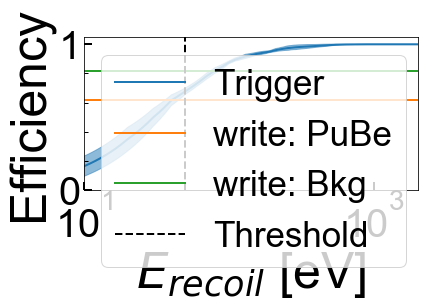

In [3]:
#Trigger efficiency function

fig,ax = plt.subplots(1,1)

color=next(ax._get_lines.prop_cycler)['color']
ax.plot(E_test,trigEff(E_test),color=color,label='Trigger')
ax.fill_between(E_test,trigEff(E_test)-dtrigEff(E_test),trigEff(E_test)+dtrigEff(E_test),alpha=0.5,color=color)


ax.axhline(eff_write, color = next(ax._get_lines.prop_cycler)['color'], label='write: PuBe')
ax.axhspan(eff_write-deff_write, eff_write+deff_write, alpha=0.5)

ax.axhline(eff_write_bkg, color = next(ax._get_lines.prop_cycler)['color'], label='write: Bkg')
ax.axhspan(eff_write_bkg-deff_write_bkg, eff_write_bkg+deff_write_bkg, alpha=0.5)


ax.axvline(E_thresh, color='k', linestyle='--', linewidth=2, label='Threshold')

ax.set_xlim(10,2e3)
ax.set_xscale('log')
ax.set_ylim(0,1.05)
ax.set_xlabel(r'$E_{recoil}$ [eV]')
ax.set_ylabel('Efficiency')

ax.legend()
plt.tight_layout()

plt.savefig('figures/trig_eff.pdf')
plt.show()